In [249]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [250]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from kneed import KneeLocator

In [251]:
df = pd.read_csv(r"data_understanding_output.csv",skipinitialspace=True)

In [252]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

word    object
PoS     object
dtype: object

In [253]:
df_train = df.drop(['word','PoS', 'valence', 'concreteness', 'aoa', 'semsize','polysemy', 'length', 'number_of_meanings', 'avg_variance_between_meanings', 'log_freq', 'sentiment'], axis=1)
df_train.dtypes

arousal         float64
dominance       float64
imageability    float64
familiarity     float64
gender          float64
dtype: object

In [254]:
df_train.columns

Index(['arousal', 'dominance', 'imageability', 'familiarity', 'gender'], dtype='object')

In [255]:
from sklearn import preprocessing

In [256]:
import warnings
warnings.filterwarnings('ignore')


In [257]:
cols = [col for col in df_train.columns]
X = df[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

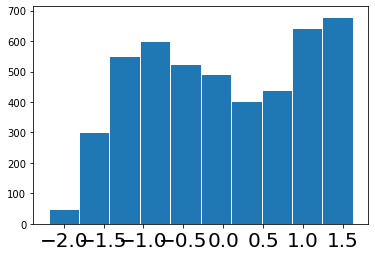

In [258]:
plt.hist(X_scal[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

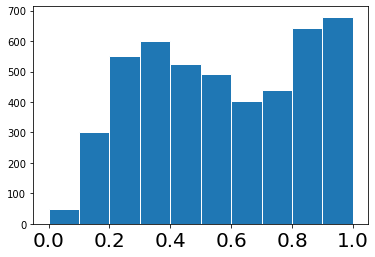

In [259]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

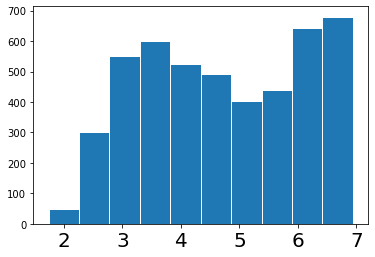

In [260]:
plt.hist(X[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [261]:
kmeans = KMeans( n_clusters=8, n_init=20, max_iter=100 )
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_init=20)

In [262]:
kmeans.labels_

array([5, 5, 6, ..., 2, 4, 3], dtype=int32)

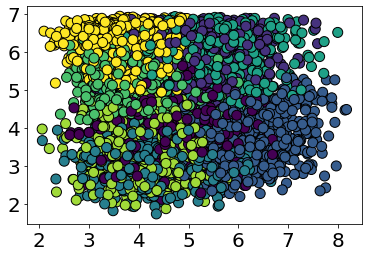

In [263]:
plt.scatter( X[:,0], X[:,2], s=100, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [264]:
kmeans.cluster_centers_

array([[0.42066684, 0.25759153, 0.42668668, 0.72118751, 0.54271501],
       [0.52866129, 0.51151716, 0.80588511, 0.72543985, 0.71431054],
       [0.68033742, 0.65932669, 0.38070388, 0.75370148, 0.46306577],
       [0.36979798, 0.42701981, 0.26580292, 0.41957901, 0.54781714],
       [0.56661698, 0.53538119, 0.83338463, 0.787697  , 0.29896534],
       [0.31637868, 0.45116935, 0.67337848, 0.47199878, 0.57475763],
       [0.3520184 , 0.51201063, 0.3233101 , 0.76168112, 0.48690443],
       [0.27498396, 0.48707207, 0.86975682, 0.77662275, 0.52070689]])

In [265]:
centers = kmeans.cluster_centers_

In [266]:
centers = scaler.inverse_transform(centers)

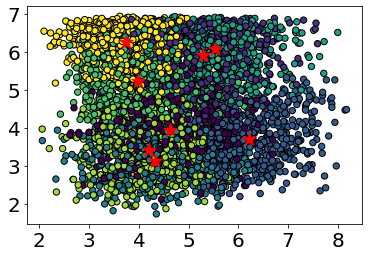

In [267]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], c='red', marker='*', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

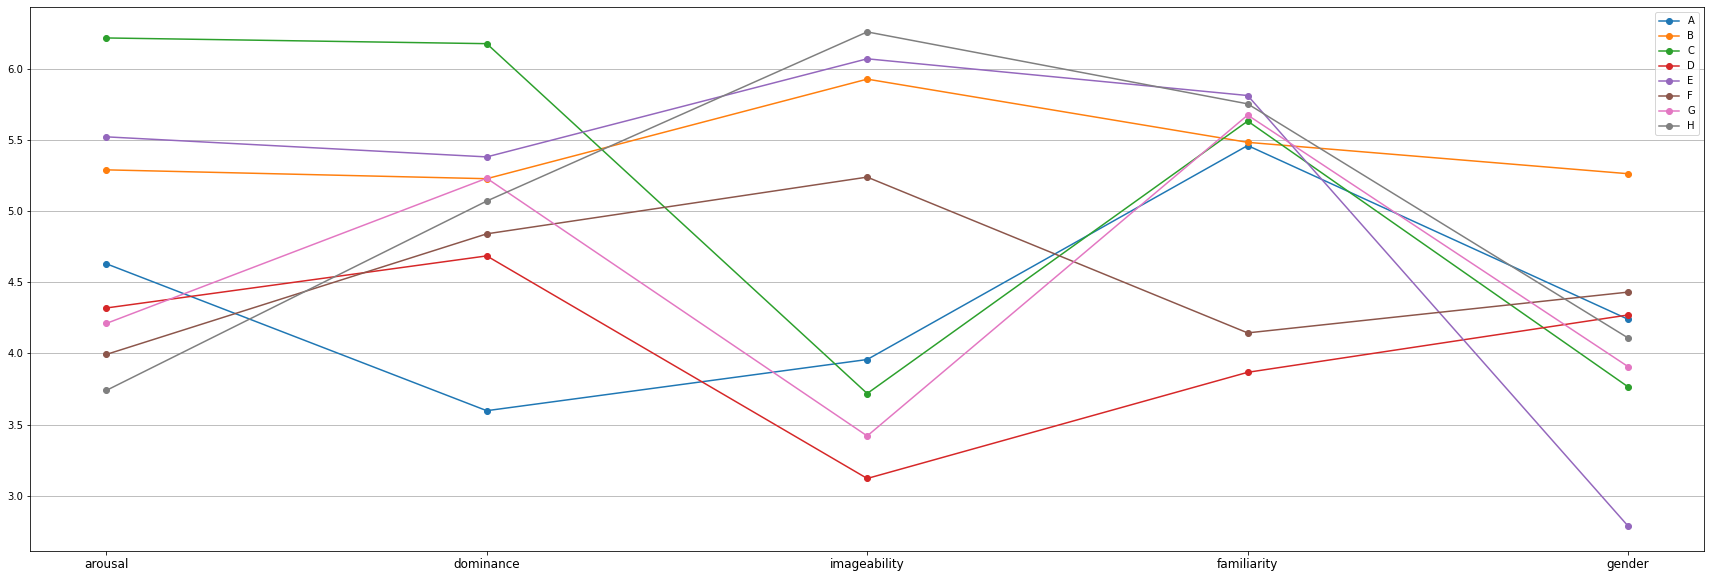

In [268]:
plt.figure(figsize=(30, 10))

clust_name = ['A', 'B', 'C','D','E','F','G','H','I','L']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=12)
plt.yticks(fontsize=10)

plt.legend(fontsize=10, loc='best')
plt.grid(axis='y')

[]

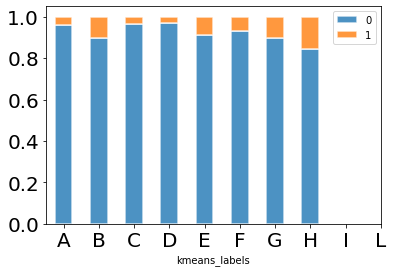

In [269]:
df_train['kmeans_labels'] = kmeans.labels_

bar_pl = df['polysemy'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [270]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([555, 506, 612, 495, 467, 581, 691, 775]))

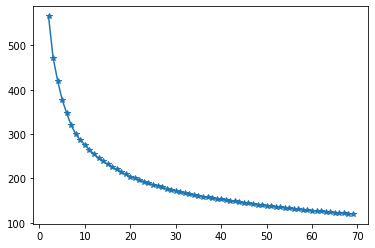

In [271]:
# kmeans
sse_list = list()
max_k = 70
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, )
    kmeans.fit(X_minmax)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list, marker='*')
plt.show()

In [272]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 120.04905894376014
Silhouette 0.15659079694203462


In [273]:
train_data = df_train.values

In [274]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('centers', kmeans.cluster_centers_)
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))



centers [[ 6.38670253e+00  5.91721203e+00  3.79551266e+00  5.72070253e+00
   3.16520570e+00  2.00000000e+00]
 [ 4.21063676e+00  5.23228944e+00  3.41779740e+00  5.67849059e+00
   3.90609696e+00  6.00000000e+00]
 [ 4.10816026e+00  3.50797436e+00  3.76396795e+00  5.53469872e+00
   4.04381090e+00 -8.88178420e-16]
 [ 3.74031613e+00  5.07285548e+00  6.26302710e+00  5.75691871e+00
   4.11072000e+00  7.00000000e+00]
 [ 5.27336929e+00  5.28642531e+00  5.95792946e+00  5.49878423e+00
   5.26458921e+00  1.00000000e+00]
 [ 4.30547143e+00  4.67101224e+00  3.11769592e+00  3.86603469e+00
   4.26064082e+00  3.00000000e+00]
 [ 5.52185256e+00  5.38368376e+00  6.07157265e+00  5.81096581e+00
   2.78182479e+00  4.00213675e+00]
 [ 3.99289138e+00  4.84093793e+00  5.24173103e+00  4.14558966e+00
   4.43737759e+00  5.00000000e+00]
 [ 6.04591148e+00  6.46286557e+00  3.64824590e+00  5.51500000e+00
   4.43736721e+00  2.00327869e+00]
 [ 5.32019392e+00  3.70254373e+00  4.29687452e+00  5.35951331e+00
   4.54325475e+00

In [275]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

In [276]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

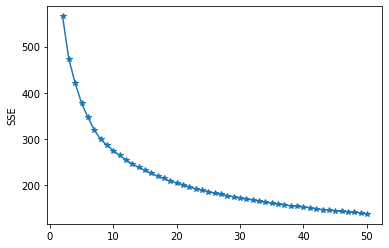

In [277]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [278]:
df_clusters[df_clusters['Labels']==3].describe()

,arousal,dominance,imageability,familiarity,gender,kmeans_labels,Labels
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,5.446808,5.385589,5.782151,4.732534,2.593890,4.095890,3.0
std,0.467309,0.384303,0.464903,0.457072,0.649649,0.296479,0.0
min,4.500000,4.588000,4.824000,3.429000,1.171000,4.000000,3.0
25%,5.065000,5.121000,5.394000,4.500000,2.118000,4.000000,3.0
50%,5.441000,5.344000,5.750000,4.815000,2.735000,4.000000,3.0
75%,5.788000,5.588000,6.177000,5.059000,3.133000,4.000000,3.0
max,6.371000,6.242000,6.629000,5.471000,3.667000,5.000000,3.0


In [279]:
dbscan = DBSCAN( eps=0.3, min_samples=10)
dbscan.fit(X_minmax)

DBSCAN(eps=0.3, min_samples=10)

In [280]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

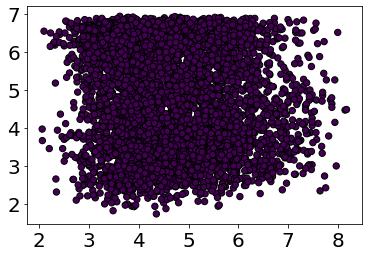

In [281]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

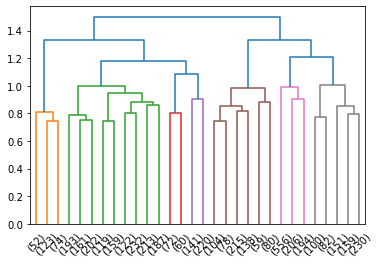

In [282]:
#hierarchical
data_dist = pdist(X_minmax, metric='euclidean')
data_link = linkage(data_dist, method='complete')

res = dendrogram(data_link, truncate_mode='lastp')

In [328]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='single')

In [284]:
hier.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [285]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [286]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=90, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [287]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=13, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

ward
labels {0: 774, 1: 586, 2: 502, 3: 375, 4: 328, 5: 292, 6: 464, 7: 252, 8: 361, 9: 266, 10: 229, 11: 167, 12: 86}
silhouette 0.25567766582201035


In [288]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage
labels {0: 4656, 1: 3, 2: 18, 3: 1, 4: 1, 5: 3}
silhouette -0.16759944357559747


In [289]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print( 'labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage
labels {0: 199, 1: 599, 2: 1174, 3: 3, 4: 312, 5: 2395}
silhouette -0.144105234072956


In [290]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# DBSCAN

In [291]:
train_data = df_train.values

In [292]:
#K=10
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

k=10
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

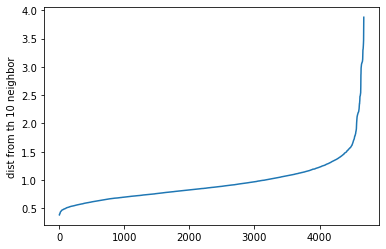

In [293]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 10 neighbor')
         
plt.show()

In [294]:
#K=15
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

k=15
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

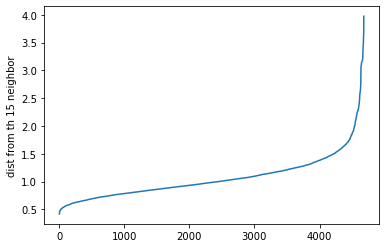

In [295]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 15 neighbor')
         
plt.show()

In [296]:
#K=13
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

k=13
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

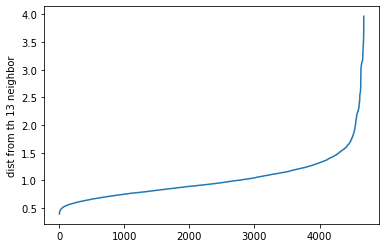

In [297]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 13 neighbor')
         
plt.show()

In [407]:
# MIN SAMPLES = 10
print ('dbscan')

dbscan = DBSCAN(eps=1.63, min_samples=10, metric='euclidean')
dbscan.fit(train_data)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 680, 1: 559, 2: 674, 3: 293, 4: 500, 5: 555, 6: 356, 7: 296, 8: 376, 9: 393}
silhouette 0.5126677616244016


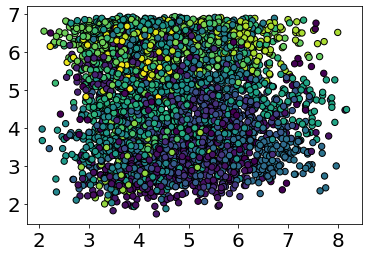

In [392]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [414]:
# MIN SAMPLES = 15
print ('dbscan')

dbscan = DBSCAN(eps=1.64, min_samples=15, metric='euclidean')
dbscan.fit(train_data)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 680, 1: 559, 2: 674, 3: 293, 4: 500, 5: 555, 6: 356, 7: 296, 8: 376, 9: 393}
silhouette 0.5156623130424551


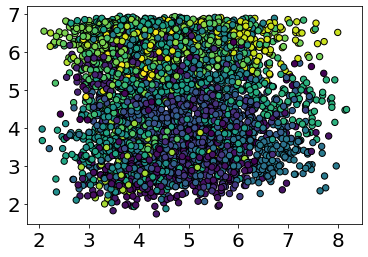

In [321]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [417]:
# MIN SAMPLES = 13
print ('dbscan')

dbscan = DBSCAN(eps=1.63, min_samples=13, metric='euclidean')
dbscan.fit(train_data)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 680, 1: 559, 2: 674, 3: 293, 4: 500, 5: 555, 6: 356, 7: 296, 8: 376, 9: 393}
silhouette 0.5129223824700038


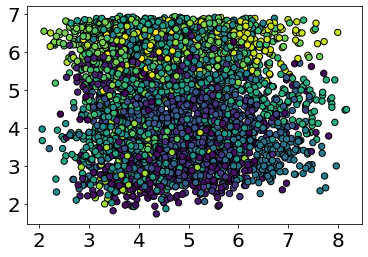

In [323]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [383]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [422]:
print( 'ward')
ward = AgglomerativeClustering(n_clusters=13, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print( 'labels', dict(zip(bins, hist)))
print( 'silhouette', silhouette_score(train_data, ward.labels_))

ward
labels {0: 559, 1: 500, 2: 356, 3: 293, 4: 421, 5: 314, 6: 410, 7: 296, 8: 376, 9: 393, 10: 366, 11: 264, 12: 134}
silhouette 0.38752986500079867


In [438]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=5, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print( 'labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage
labels {0: 3523, 1: 1057, 2: 26, 3: 76}
silhouette -0.03792228091359016


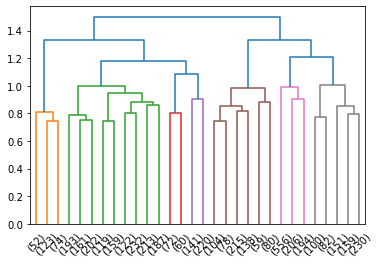

In [385]:
data_dist = pdist(X_minmax, metric='euclidean')
data_link = linkage(data_dist, method='complete')

res = dendrogram(data_link, truncate_mode='lastp')